<a href="https://colab.research.google.com/github/PolyGon-13/AdventureDesign1/blob/main/study/Visualization/01_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 코랩 환경에서 한글 깨짐 해결 방법
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# line plot

In [3]:
df=pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
df=df.ffill() # 누락값을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [5]:
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul=df_seoul.rename({'전입지별':'전입지'},axis=1)
df_seoul=df_seoul.set_index('전입지')
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [6]:
sr_one=df_seoul.loc['경기도']
sr_one.head()

,경기도
1970,130149
1971,150313
1972,93333
1973,143234
1974,149045


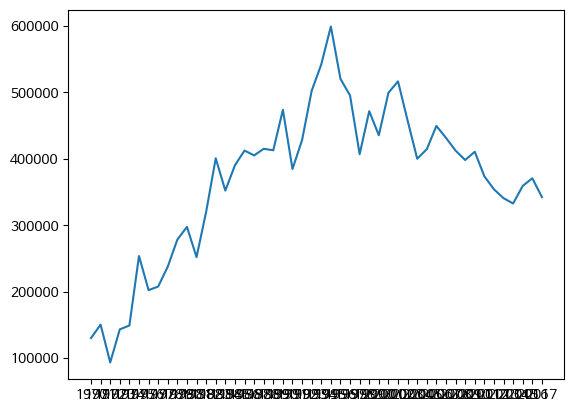

In [7]:
plt.plot(sr_one.index,sr_one.values)

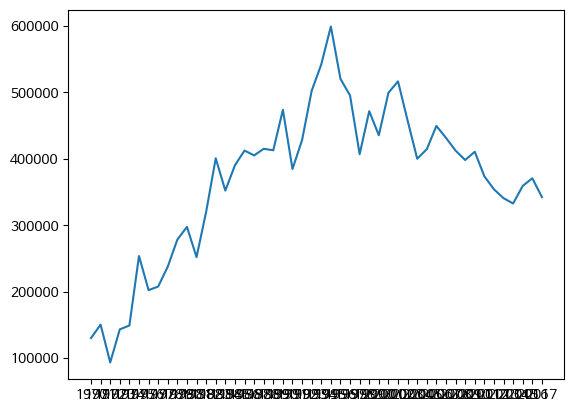

In [8]:
plt.plot(sr_one)
plt.show()

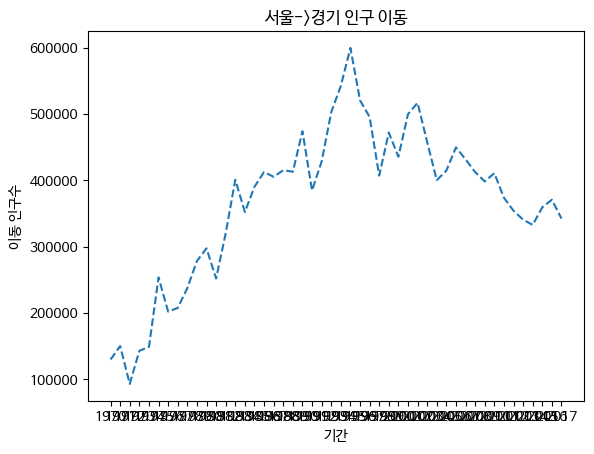

In [9]:
plt.plot(sr_one.index,sr_one.values,linestyle='--')

plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

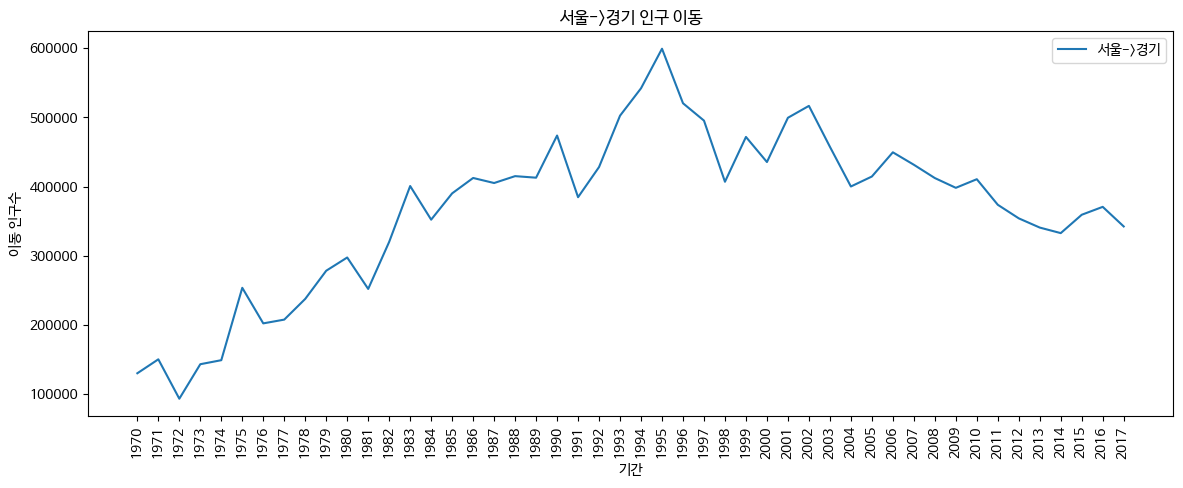

In [10]:
sr_one=df_seoul.loc['경기도']

plt.figure(figsize=(14,5)) # 그림 사이즈 늘리기
plt.xticks(rotation='vertical') # x축 눈금 회전

plt.plot(sr_one.index,sr_one.values)
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best') # 범례

plt.show()

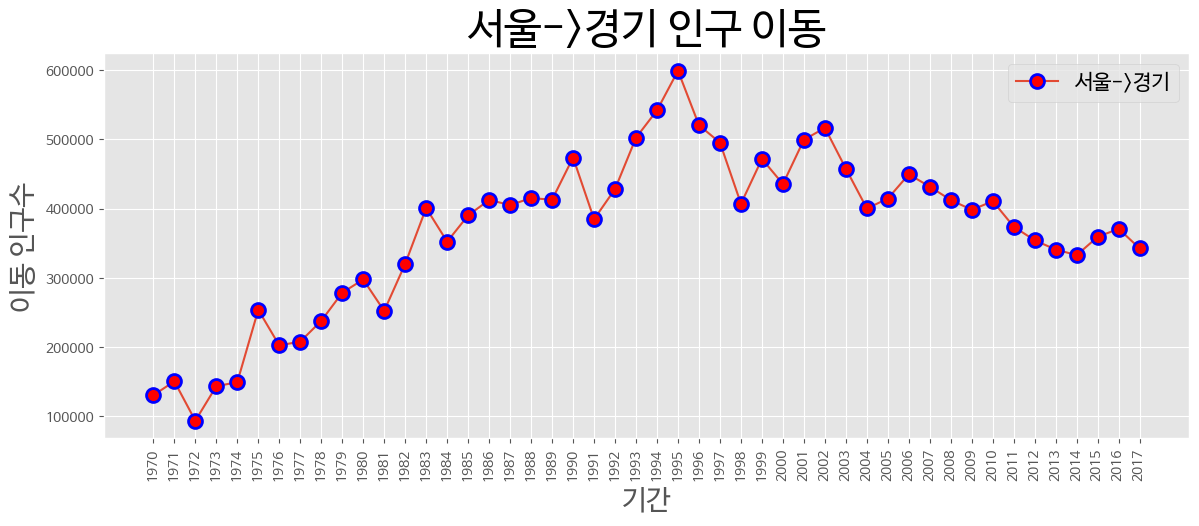

In [11]:
sr_one=df_seoul.loc['경기도']

plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation='vertical')
plt.plot(sr_one.index,sr_one.values,
         marker='o',
         markerfacecolor='red', # 마커 내부 색
         markeredgecolor='blue', # 마커 테두리 색
         markeredgewidth=2, # 마커 테두리 두께
         markersize=10) # 마커 사이즈 (원의 지름)

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간',size=20)
plt.ylabel('이동 인구수',size=20)
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)

plt.show()

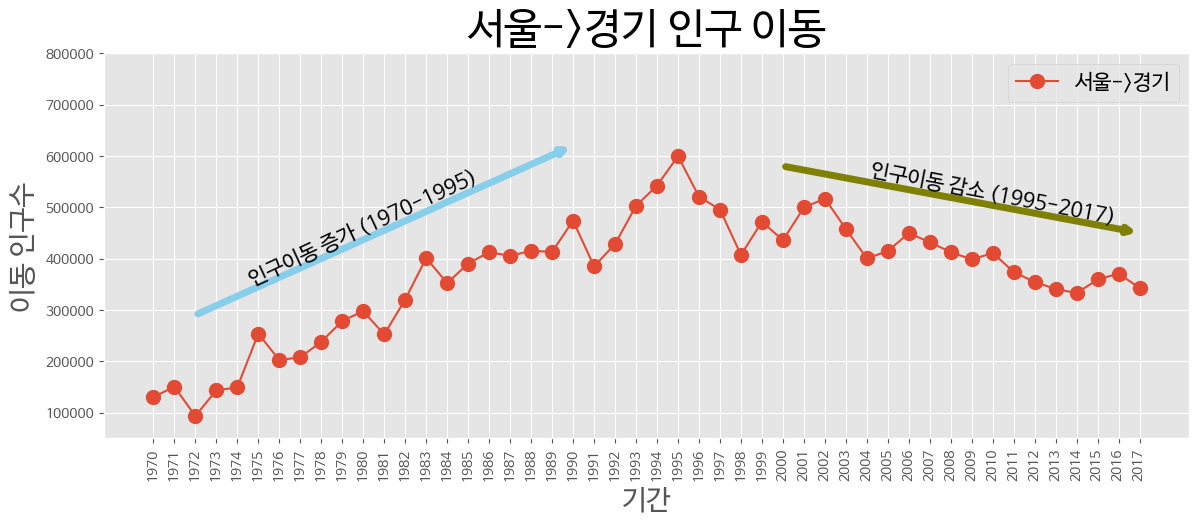

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation='vertical')
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10)

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간',size=20)
plt.ylabel('이동 인구수',size=20)
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)

plt.ylim(50000,800000) # y축 범위 지정

plt.annotate('',
             xy=(20,620000), # 화살표 머리 부분 (끝점)
             xytext=(2,290000), # 화살표 꼬리 부분 (시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->',color='skyblue',lw=5)) # 화살표 서식

plt.annotate('',
             xy=(47,450000),
             xytext=(30,580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',color='olive',lw=5))
plt.annotate('인구이동 증가 (1970-1995)', # 텍스트 입력
             xy=(10,350000),
             rotation=25, # 텍스트 회전 각도 (양수=반시계)
             va='baseline', # 텍스트 상하정렬
             ha='center', # 텍스트 좌우정렬
             fontsize=15)

plt.annotate('인구이동 감소 (1995-2017)',
             xy=(40,470000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15)

plt.show()

## Matplotlib의 기본 구조 (Figure 객체, Axes 객체)

In [24]:
samsung_revenue=pd.read_csv('./data/삼성전자_분기별_매출액.csv')
samsung_revenue=samsung_revenue.sort_values(by='quarter',ascending=True) # 기준 열, 오름차순 여부
samsung_revenue

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2
0,67404652000000,2023-Q3


In [25]:
fig=plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


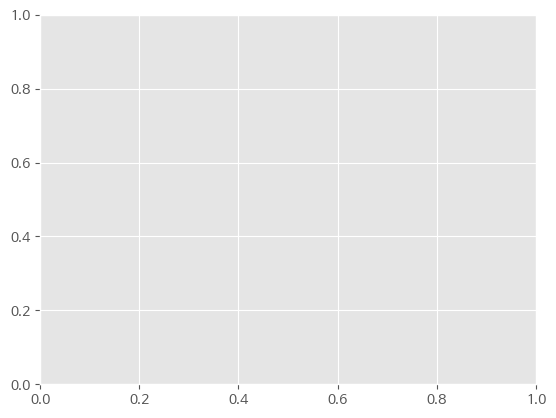

In [26]:
fig,axe=plt.subplots()
print(fig)
print(axe)

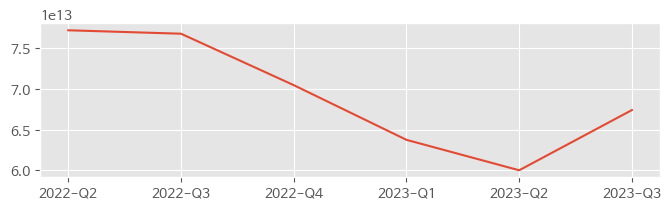

In [27]:
fig,axe=plt.subplots(figsize=(8,2))
axe.plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

Figure(640x480)
[<Axes: > <Axes: >]


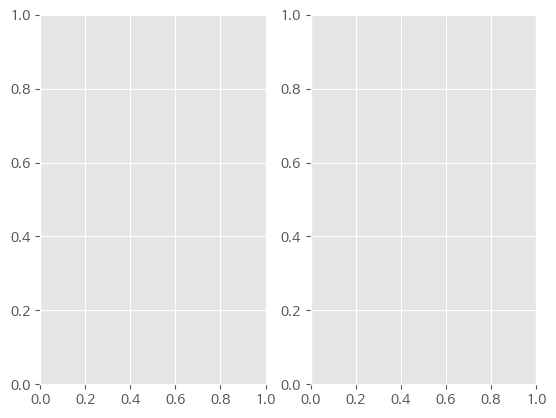

In [28]:
fig,axes=plt.subplots(1,2)
print(fig)
print(axes)

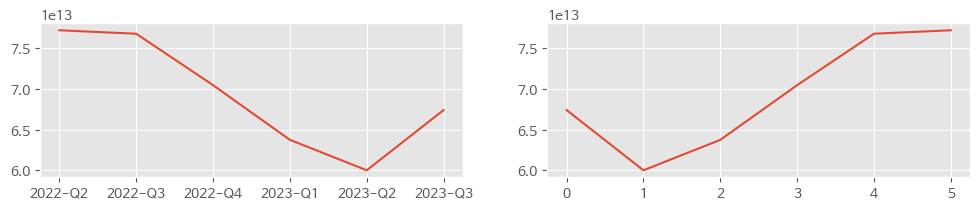

In [30]:
fig,axes=plt.subplots(1,2,figsize=(12,2))
axes[0].plot(samsung_revenue['quarter'],samsung_revenue['value'])
samsung_revenue['value'].plot(ax=axes[1])
plt.show()

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


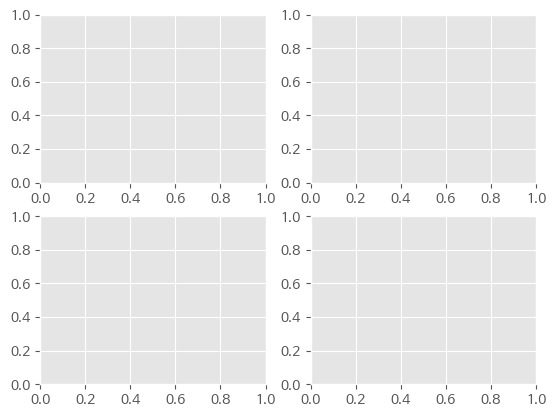

In [31]:
fig,axes=plt.subplots(2,2)
print(fig)
print(axes)

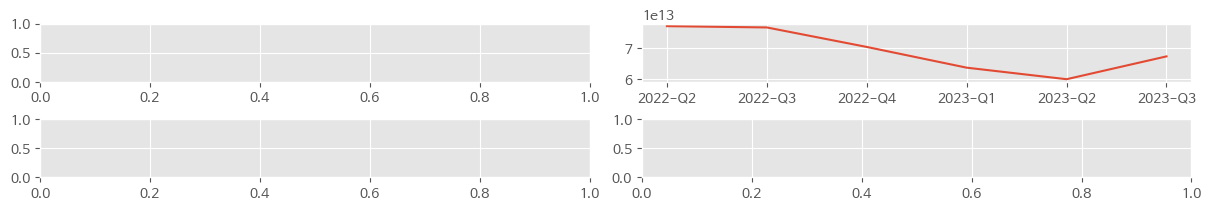

In [32]:
fig,axes=plt.subplots(2,2,figsize=(12,2),constrained_layout=True) # constrained_layout은 4개의 subplot들 사이의 간격을 자동으로 조정하여 겹치지 않도록 하는 옵션
axes[0,1].plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

Figure(640x480)
{'top_left': <Axes: label='top_left'>, 'right': <Axes: label='right'>, 'bottom_left': <Axes: label='bottom_left'>}


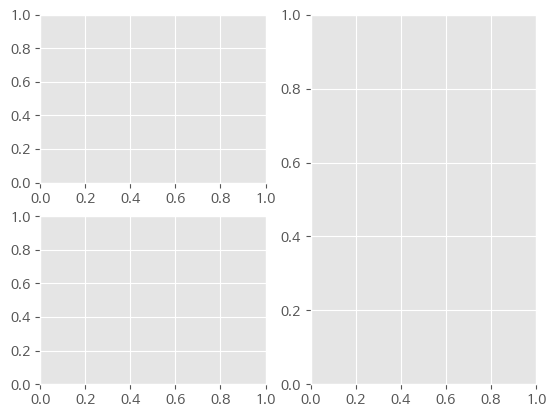

In [33]:
fig,axes=plt.subplot_mosaic([['top_left','right'],
                             ['bottom_left','right']])
print(fig)
print(axes)

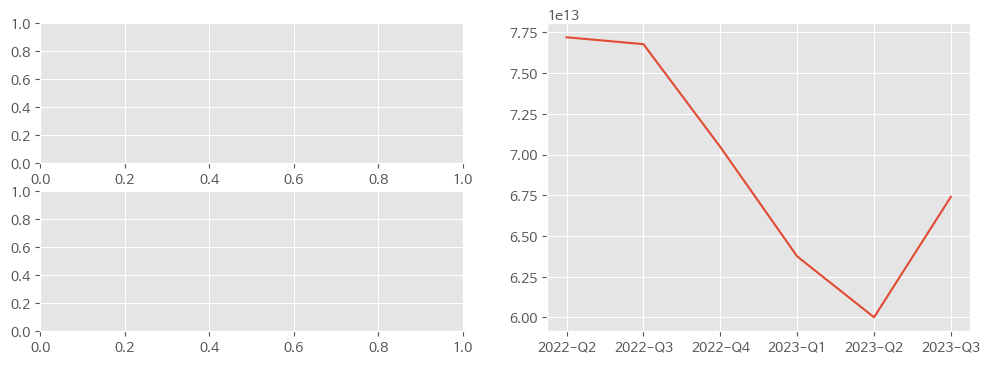

In [34]:
fig,axes=plt.subplot_mosaic([['top_left','right'],
                             ['bottom_left','right']],
                            figsize=(12,4))
axes['right'].plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

## Axes 객체 그래프 꾸미기

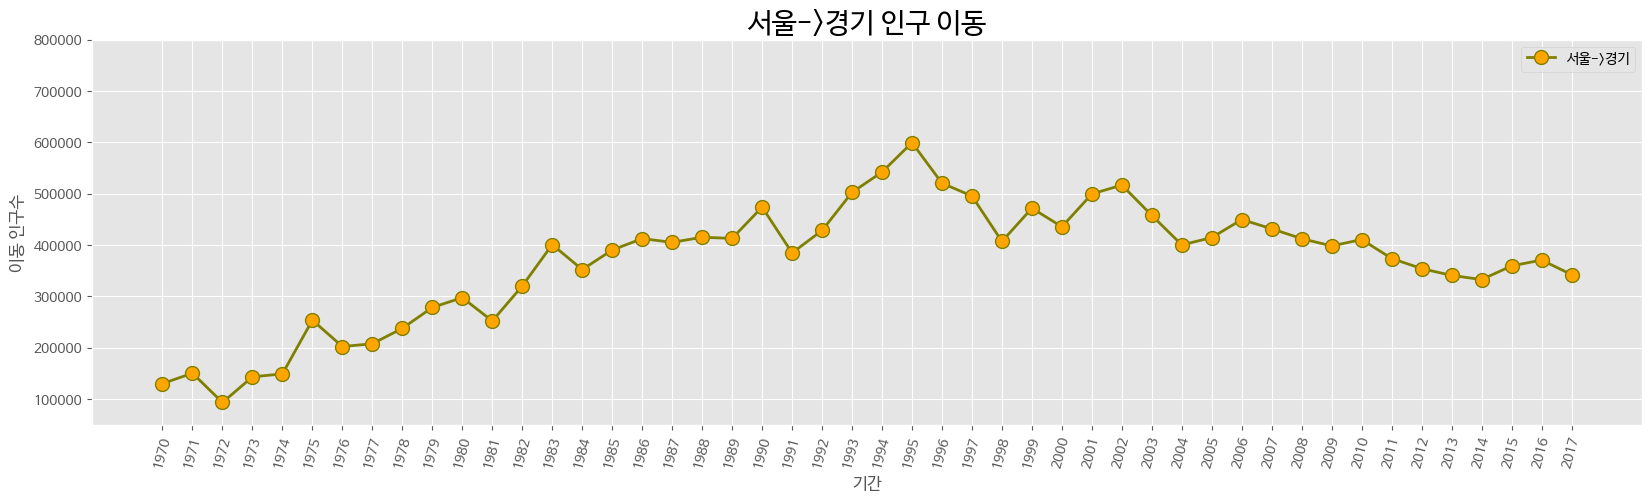

In [35]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(sr_one,marker='o',markerfacecolor='orange',markersize=10,
        color='olive',linewidth=2,label='서울->경기') # label로 plot 함수에서 범례 지정
ax.legend(loc='best')

ax.set_ylim(50000,800000)

ax.set_title('서울->경기 인구 이동',size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticks(sr_one.index) # x축에 표시할 특정 눈금 지정
ax.set_xticklabels(sr_one.index,rotation=75) # x축의 특정 눈금에 대한 텍스트 지정

ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()

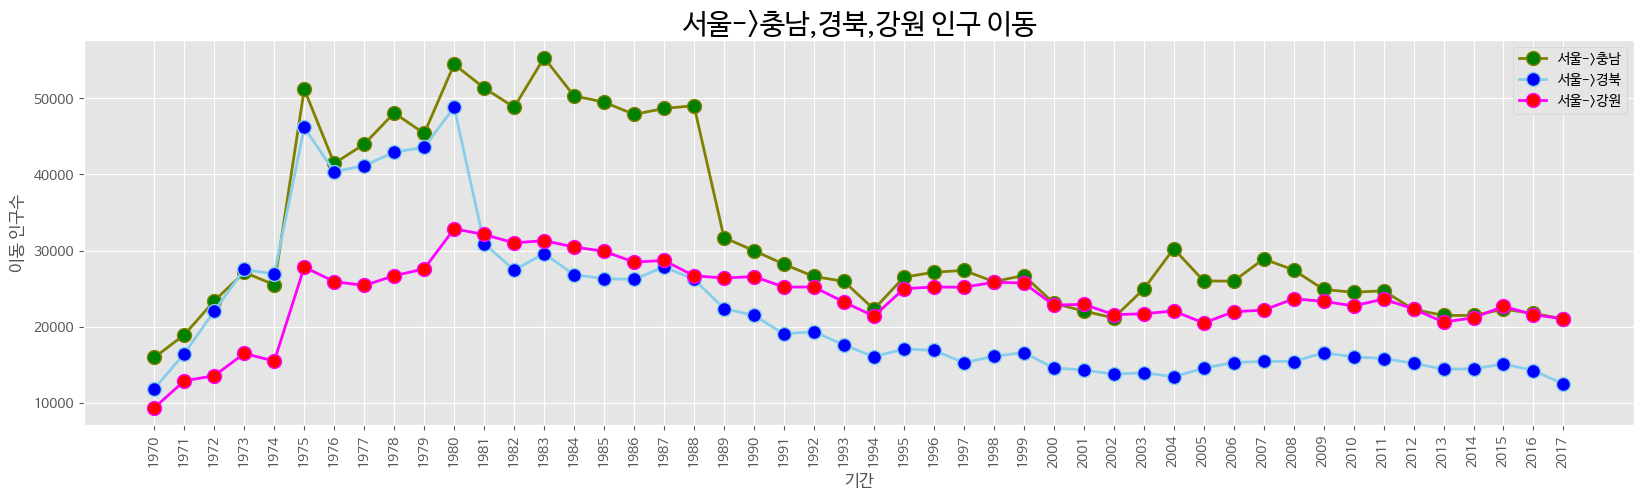

In [42]:
col_years=list(map(str,range(1970,2018))) # map(str,a)는 a를 문자열로 변경, list(b)로 b를 리스트로 저장 => ['1970','1971', ... , '2018']
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울->충남')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax.plot(col_years,df_3.loc['강원도',:],marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울->강원')

ax.legend(loc='best')

ax.set_title('서울->충남,경북,강원 인구 이동',size=20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticks(range(len(col_years)))
ax.set_xticklabels(col_years,rotation=90)

ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)

plt.show()

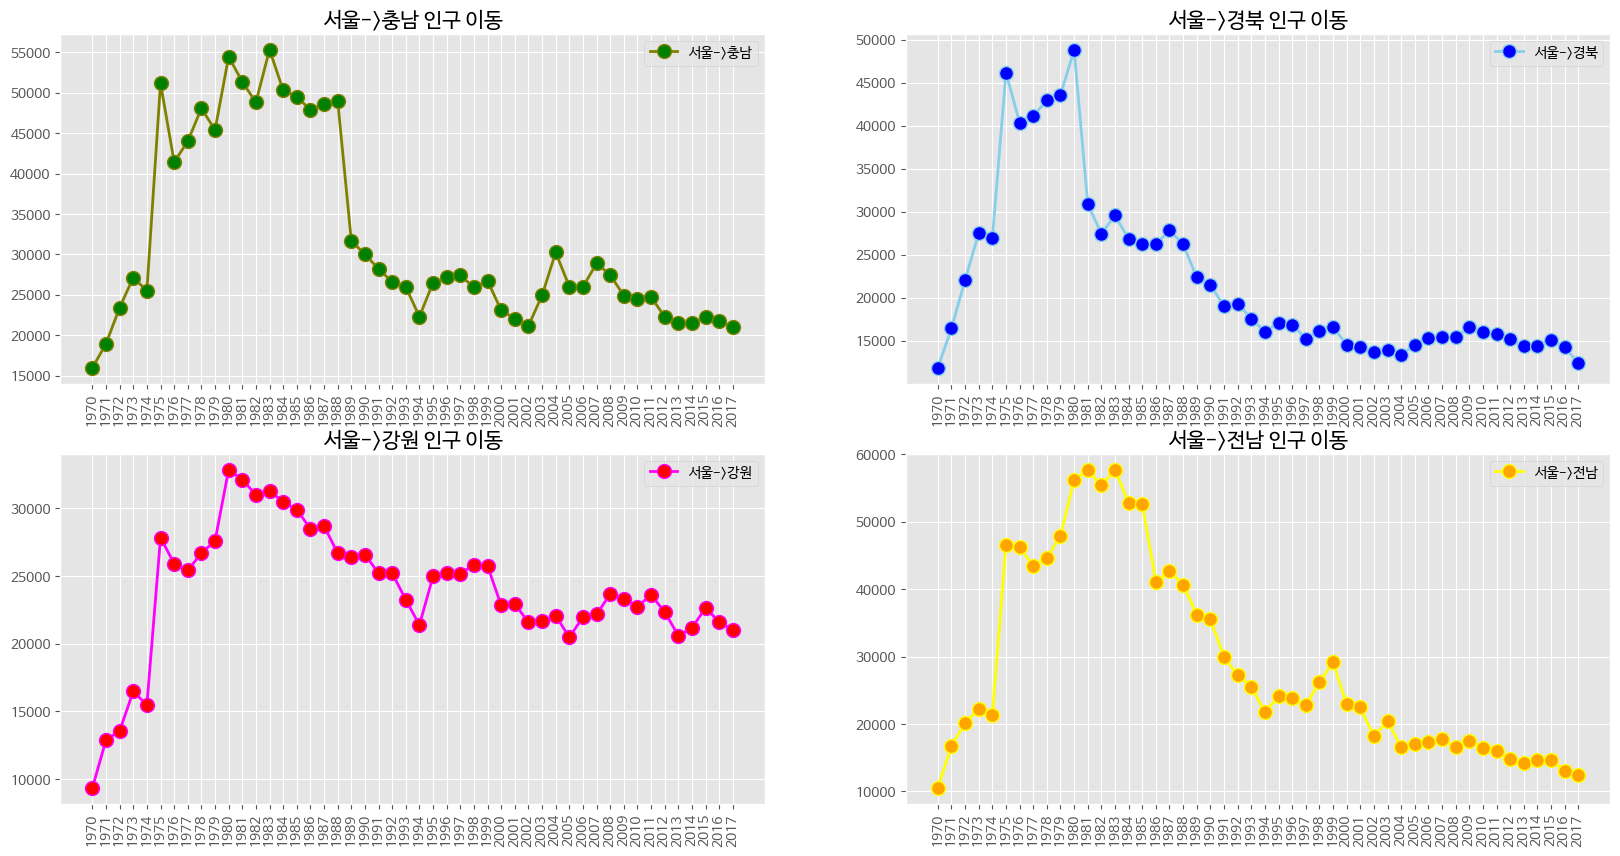

In [48]:
col_years=list(map(str,range(1970,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.plot(col_years,df_4.loc['충청남도',:],marker='o',markerfacecolor='green',
         markersize=10,color='olive',linewidth=2,label='서울->충남')
ax2.plot(col_years,df_4.loc['경상북도',:],marker='o',markerfacecolor='blue',
         markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax3.plot(col_years,df_4.loc['강원도',:],marker='o',markerfacecolor='red',
         markersize=10,color='magenta',linewidth=2,label='서울->강원')
ax4.plot(col_years,df_4.loc['전라남도',:],marker='o',markerfacecolor='orange',
         markersize=10,color='yellow',linewidth=2,label='서울->전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구 이동',size=15)
ax2.set_title('서울->경북 인구 이동',size=15)
ax3.set_title('서울->강원 인구 이동',size=15)
ax4.set_title('서울->전남 인구 이동',size=15)

ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))
ax3.set_xticks(range(len(col_years)))
ax4.set_xticks(range(len(col_years)))

ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)

plt.show()